<a href="https://colab.research.google.com/github/Ahmed-Shaheen907/1-hassan-badran-t2-ahmed-shaheen-t2/blob/main/Copy_of_Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Shaheen

ID: 52-5113

Tutorial: T-2

---

Name: Hassan Badran

ID: 52-2214

Tutorial: T-2

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-32-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [34]:
df.describe()


,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [35]:
df.isnull().sum()


customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [36]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [37]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")


customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [38]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


## Data Cleaning

In [39]:
import pandas as pd

# Assuming df is your DataFrame
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)




<ipython-input-39-6edcedc7c84e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)


In [40]:
import pandas as pd

# Assuming df is your DataFrame
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace('$', ''), errors='coerce').fillna(0).astype(int)


<ipython-input-40-f75d7a58dfdb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace('$', ''), errors='coerce').fillna(0).astype(int)


In [41]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object

In [42]:
df.drop(['customerID'], axis="columns", inplace=True)

In [43]:
df['TotalCharges'].fillna( df['MonthlyCharges']*df['tenure'],inplace=True )

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

**Answer for Q1**: Your answer here

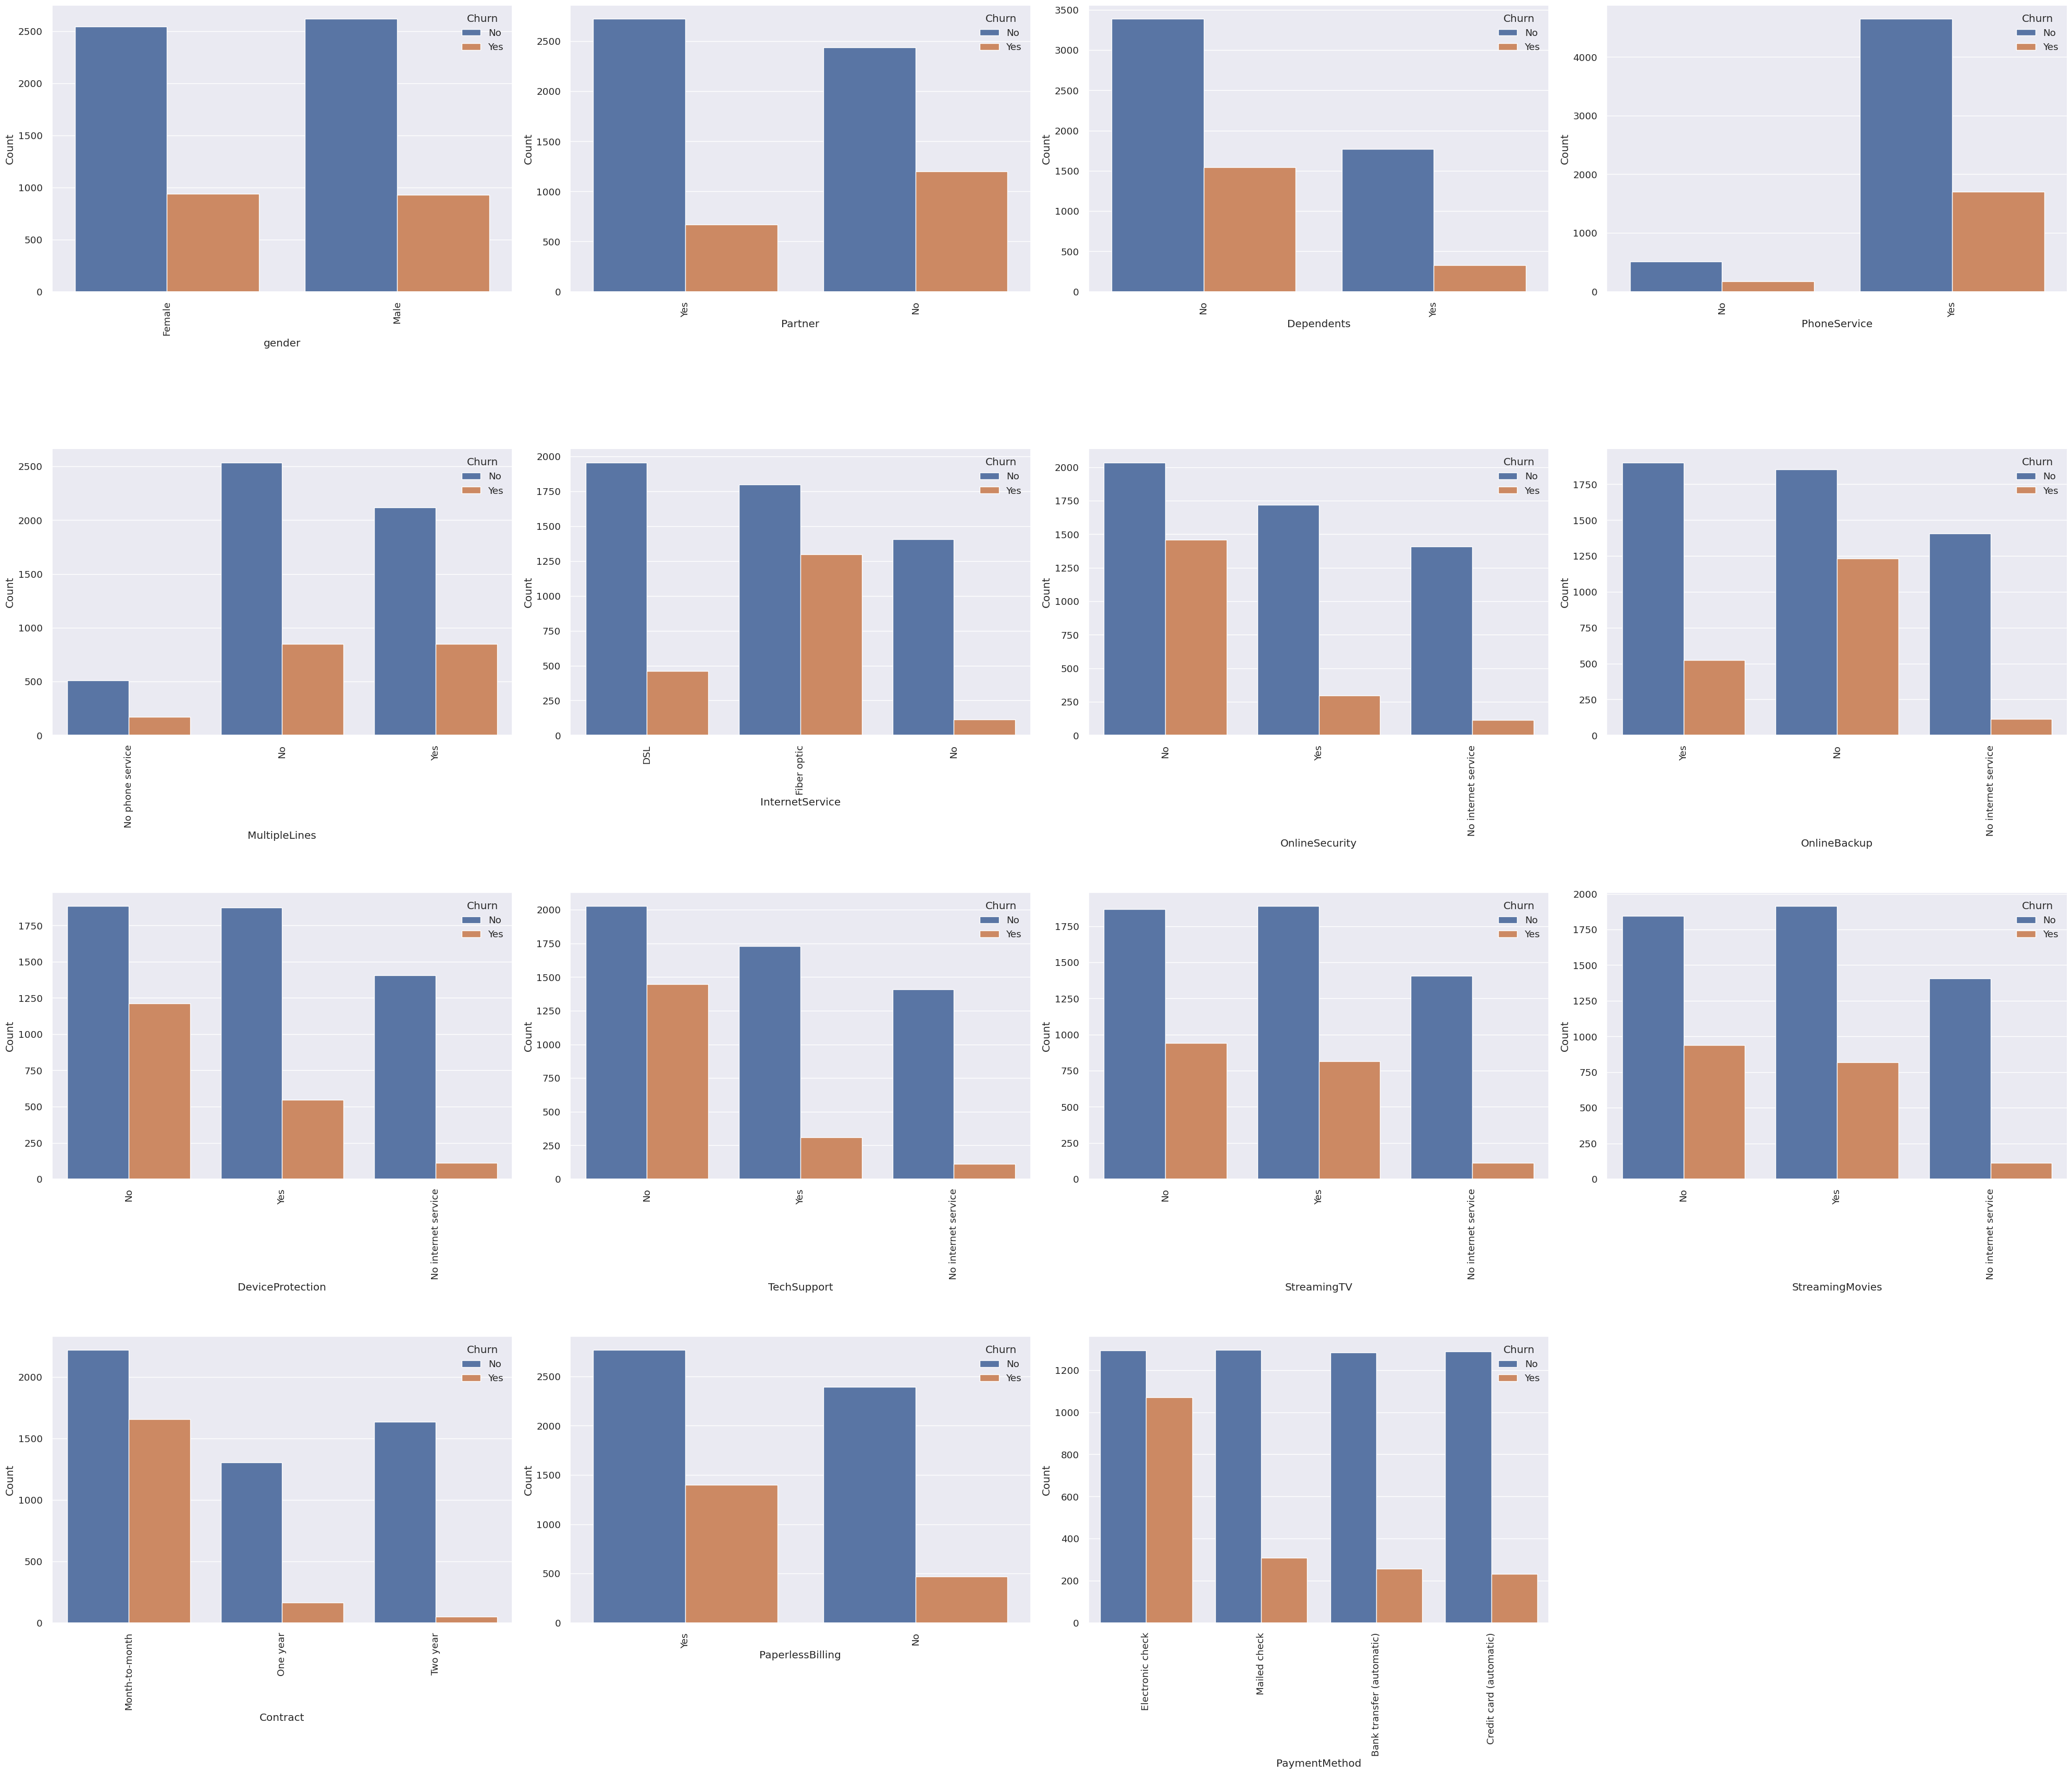

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Churn' is the column indicating customer churn (1 for churn, 0 for not churn)
churn_column = 'Churn'

# Selecting categorical columns excluding the 'Churn' column
categorical_features = [column for column in df.select_dtypes(include='object').columns if column != churn_column]

# Set seaborn font scale
sns.set(font_scale=1.2)

# Set the size of the overall plot
plt.figure(figsize=(40, 40))

# Loop through categorical features for visualization
for i, column in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=column, hue=churn_column, data=df)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.xlabel(f'{column}')
    plt.legend(title=churn_column)

# Show the plot
plt.tight_layout()
plt.show()



<ipython-input-45-db21ec992bf2>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


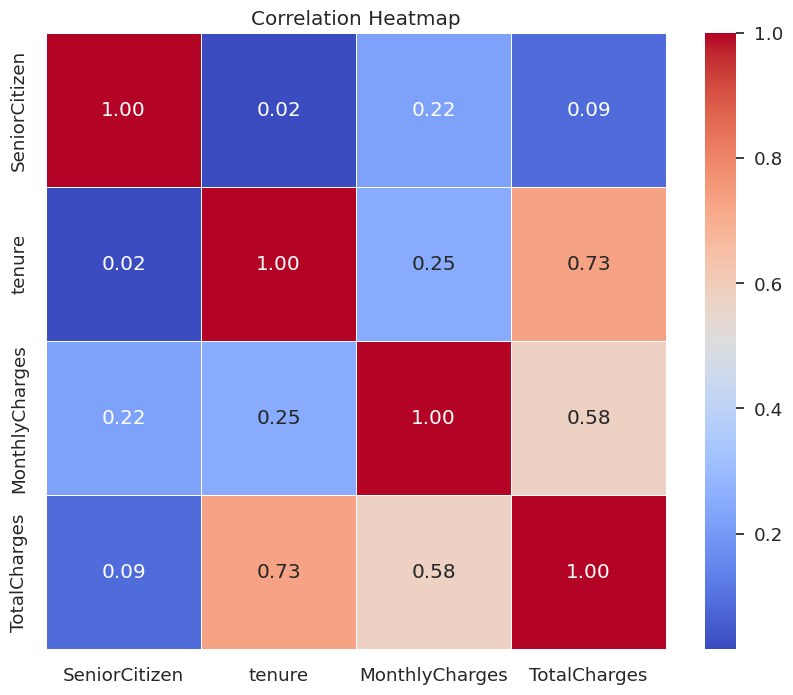

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Churn' is the column indicating customer churn (1 for churn, 0 for not churn)
churn_column = 'Churn'

# Selecting relevant columns for correlation analysis
selected_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_df = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Set seaborn font scale
sns.set(font_scale=1.2)

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

Attribute with the highest correlation with Churn: tenure
Highest correlation value: 0.3540493589532504

**Q2: Which payment method has the highest churn rate?**

**Visualization**

**Answer for Q2**: Your answer here

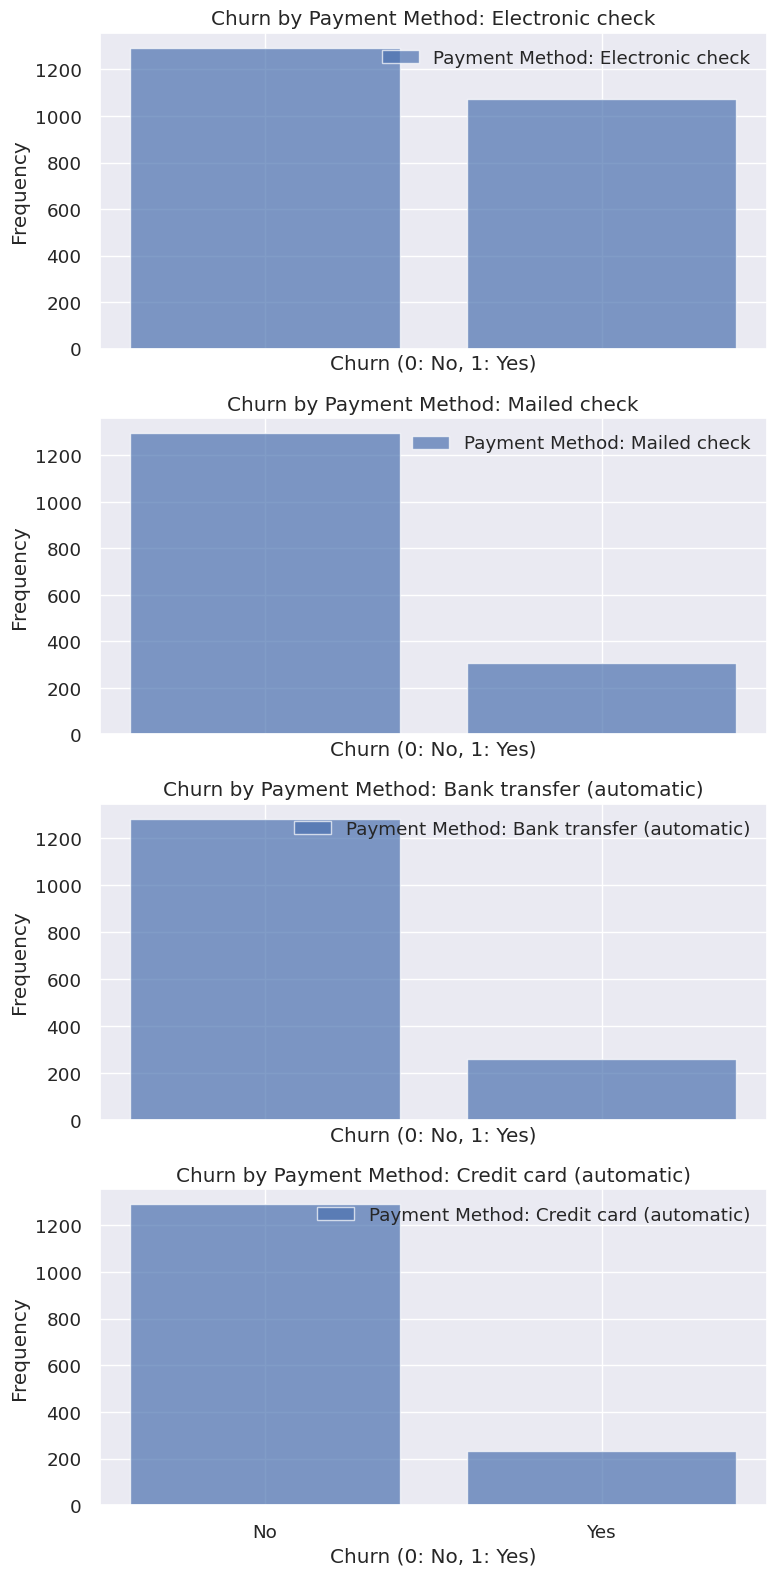

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
payment_methods = df['PaymentMethod'].unique()

# Create subplots
fig, axs = plt.subplots(len(payment_methods), 1, figsize=(8, 4 * len(payment_methods)), sharex=True)

# Iterate over each payment method
for i, payment_method in enumerate(payment_methods):
    churn_values = df[df['PaymentMethod'] == payment_method]['Churn']

    # Plot histogram for each payment method
    axs[i].hist(churn_values, bins=[-0.5, 0.5, 1.5], rwidth=0.8, alpha=0.7, label=f'Payment Method: {payment_method}')
    axs[i].set_title(f'Churn by Payment Method: {payment_method}')
    axs[i].set_xlabel('Churn (0: No, 1: Yes)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Display the histograms
plt.show()


electronic check is has highest churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes


**Answer for Q3**:
Churned Customers Percentiles:
25%     2.0
50%    10.0
75%    29.0
Name: tenure, dtype: float64

Non-Churned Customers Percentiles:
25%    15.0
50%    38.0
75%    61.0
Name: tenure, dtype: float64

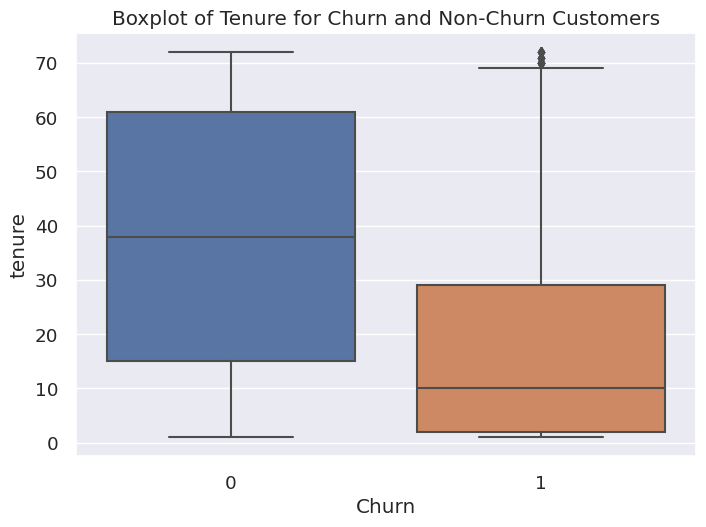

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Churn' column to numeric (assuming 'No' is 0 and 'Yes' is 1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Assuming 'Churn' and 'tenure' are columns in your DataFrame 'df'
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Boxplot of Tenure for Churn and Non-Churn Customers')
plt.show()

## Data Preparation for Modelling

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,1


In [50]:
import pandas as pd


columns_to_drop = ['gender']

df = df.drop(columns=columns_to_drop)

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,1


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Encoding the 'income_bracket' column
df['Contract'] = label_encoder.fit_transform(df['Contract'])

# Print the updated DataFrame
print(df)

      SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0                 0     Yes         No       1           No  No phone service   
1                 0      No         No      34          Yes                No   
2                 0      No         No       2          Yes                No   
3                 0      No         No      45           No  No phone service   
4                 0      No         No       2          Yes                No   
...             ...     ...        ...     ...          ...               ...   
7027              0     Yes        Yes      24          Yes               Yes   
7028              0     Yes        Yes      72          Yes               Yes   
7029              0     Yes        Yes      11           No  No phone service   
7030              1     Yes         No       4          Yes               Yes   
7031              0      No         No      66          Yes                No   

     InternetService Online

In [52]:
columns_to_encode = ['Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies','PaymentMethod','PaperlessBilling']
df = pd.get_dummies(df, columns=columns_to_encode)


In [53]:

df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,0,29.85,29,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,34,1,56.95,1889,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,0,2,0,53.85,108,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,0,45,1,42.30,1840,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,2,0,70.70,151,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [54]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Now, df contains normalized values in the specified columns

# Display the first few rows of the DataFrame after normalization
print(df.head())


   SeniorCitizen    tenure  Contract  MonthlyCharges  TotalCharges  Churn  \
0            0.0  0.000000         0        0.115423      0.003339      0   
1            0.0  0.464789         1        0.385075      0.217526      0   
2            0.0  0.014085         0        0.354229      0.012437      1   
3            0.0  0.619718         1        0.239303      0.211884      0   
4            0.0  0.014085         0        0.521891      0.017388      1   

   Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0           0            1              1               0  ...   
1           1            0              1               0  ...   
2           1            0              1               0  ...   
3           1            0              1               0  ...   
4           1            0              1               0  ...   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  \
0                0                   1                       

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [57]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('attrition')

## Evaluation

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [59]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997789     0.997698  0.997765     0.997744      0.997765
recall        0.999170     0.993884  0.997765     0.996527      0.997765
f1-score      0.998479     0.995787  0.997765     0.997133      0.997764
support    3614.000000  1308.000000  0.997765  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [   8 1300]]

Test Result:
Accuracy Score: 67.20%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.804549    0.406828  0.672038     0.605688      0.698804
recall        0.730794    0.509804  0.672038     0.620299      0.672038
f1-score      0.765900    0.452532  0.672038     0.609216      0.682583
support    1549.000000  561.000000  

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.406827880512091
Recall:  0.5098039215686274
F1_score:  0.45253164556962017


## Bonus (Optional)

In [61]:
# sklearn regression module
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluation
lr_model=LogisticRegression(max_iter=2000)
knn_model=KNeighborsClassifier()

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [63]:
lr_model.score(X_test,y_test)

0.79478672985782